<a href="https://colab.research.google.com/github/educhile1/challenge_datascience1-ONE/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt




url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"



#SELECCIONA LOS MINIMOS Y LOS PONE EN ROJO LOS DEMAS EN VERDE
def color_minimo_otros_verde(col):
    min_val = col.min()
    return ['background-color: lightcoral' if v == min_val else 'background-color: green' for v in col]





tienda = pd.read_csv(url)
display(tienda.info())
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda.head()
dataTienda1= pd.DataFrame(tienda)
dataTiendaClear= dataTienda1.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)
tienda['anho'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y').dt.year # Convertir a tipo de dato fecha
#display(tienda['anho'])
#display(tienda)
anhoTienda1=tienda.groupby(['anho'])
group_ano_data=[]
for nombre, grupo_df in anhoTienda1:
          counts = grupo_df['Precio'].value_counts()
          #total += counts.sum()
          group_ano_data.append(
            {"Grupo": nombre, "Count": counts.sum()}
          )
display(group_ano_data)




dataTienda2= pd.DataFrame(tienda2)
dataTienda2Clear= dataTienda2.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)

dataTienda3= pd.DataFrame(tienda3)
dataTienda3Clear= dataTienda3.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)


dataTienda4= pd.DataFrame(tienda4)
dataTienda4Clear= dataTienda4.drop(columns=['Cantidad de cuotas', 'lat', 'lon', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra', 'Calificación']).sort_values(by='Producto', ascending=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


None

[{'Grupo': (2020,), 'Count': np.int64(715)},
 {'Grupo': (2021,), 'Count': np.int64(739)},
 {'Grupo': (2022,), 'Count': np.int64(713)},
 {'Grupo': (2023,), 'Count': np.int64(192)}]

#1. Análisis de facturación



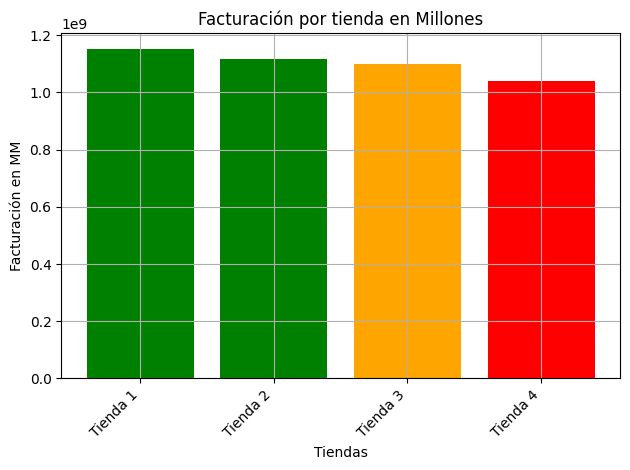

In [ ]:
factTienda1= dataTienda1['Precio'].sum()
factTienda2= dataTienda2['Precio'].sum()
factTienda3= dataTienda3['Precio'].sum()
factTienda4= dataTienda4['Precio'].sum()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [factTienda1, factTienda2, factTienda3, factTienda4]
colores=['green', 'green', 'orange', 'red']

plt.bar(tiendas, facturas, color=colores)
plt.xlabel('Tiendas')
plt.ylabel('Facturación en MM')
plt.title("Facturación por tienda en Millones")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()



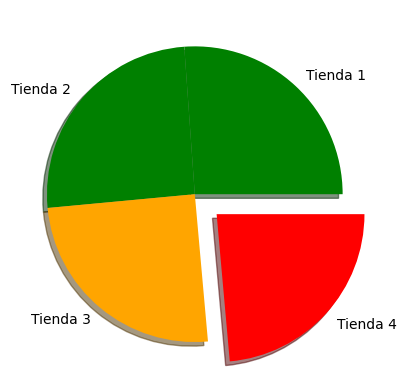

In [ ]:

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [factTienda1, factTienda2, factTienda3, factTienda4]
colores=['green', 'green', 'orange', 'red']
separacion = [0, 0, 0, 0.2]

plt.pie(facturas,labels=tiendas,  explode=separacion, colors=colores, shadow = True)
plt.show()

np.float64(1150880400.0)

np.float64(1116343500.0)

np.float64(1098019600.0)

np.float64(1038375700.0)

# 2. Ventas por categoría

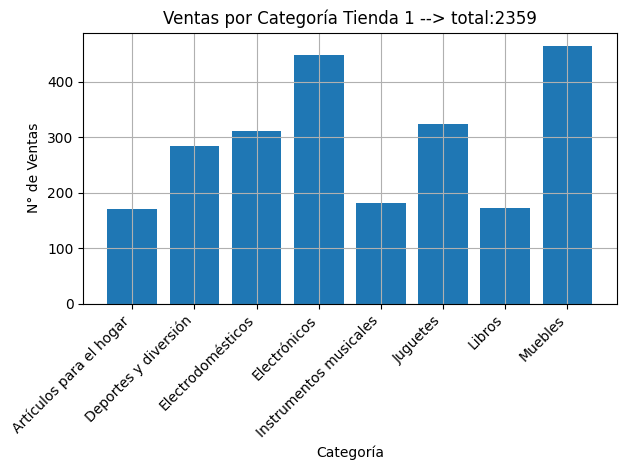

In [ ]:
#TIENDA 1 POR CATEGORIAS
%matplotlib inline
total=0
group_data = []
catTienda1=dataTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
          counts = grupo_df['Categoría del Producto'].value_counts()
          total += counts.sum()
          group_data.append(
            {"Grupo": nombre, "Count": counts.sum()}
          )

conteo = [group['Count'] for group in group_data]
grupos = [group['Grupo'][0] for group in group_data]

plt.bar(grupos, conteo)
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 1 --> total:"+str(total))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

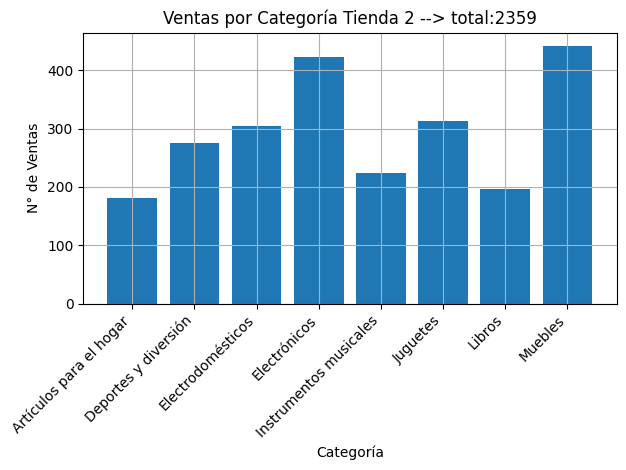

In [ ]:
#TIENDA 2 por CATEGORIAS

%matplotlib inline
total=0
group_data2 = []
catTienda2=dataTienda2Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda2:
          counts = grupo_df['Categoría del Producto'].value_counts()
          total += counts.sum()
          group_data2.append(
            {"Grupo": nombre, "Count": counts.sum()}
          )

conteo = [group['Count'] for group in group_data2]
grupos = [group['Grupo'][0] for group in group_data2]

plt.bar(grupos, conteo)
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 2 --> total:"+str(total))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

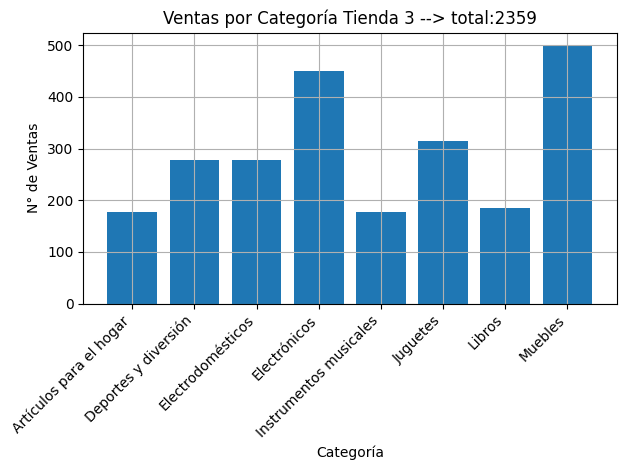

In [ ]:
#TIENDA 3 POR CATEGORIAS
%matplotlib inline
total=0
group_data3 = []
catTienda3=dataTienda3Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda3:
          counts = grupo_df['Categoría del Producto'].value_counts()
          total += counts.sum()
          group_data3.append(
            {"Grupo": nombre, "Count": counts.sum()}
          )

conteo = [group['Count'] for group in group_data3]
grupos = [group['Grupo'][0] for group in group_data3]

plt.bar(grupos, conteo)
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 3 --> total:"+str(total))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

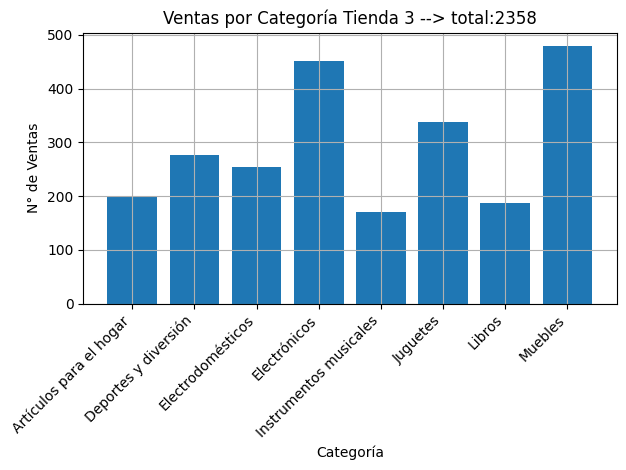

In [ ]:
#TIENDA 4 POR CATEGORIAS
%matplotlib inline
total=0
group_data4 = []
catTienda4=dataTienda4Clear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda4:
          counts = grupo_df['Categoría del Producto'].value_counts()
          total += counts.sum()
          group_data4.append(
            {"Grupo": nombre, "Count": counts.sum()}
          )

conteo = [group['Count'] for group in group_data4]
grupos = [group['Grupo'][0] for group in group_data4]

plt.bar(grupos, conteo)
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 3 --> total:"+str(total))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

# 3. Calificación promedio de la tienda


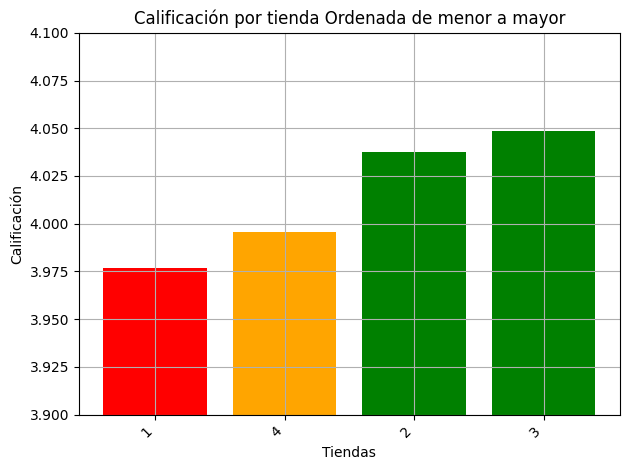

Tienda,Calificación
1,3.976685
4,3.995759
2,4.037304
3,4.048326


In [ ]:
dataCalifTienda=[]

calPromTienda1=  dataTienda1['Calificación'].mean()
calPromTienda2=  dataTienda2['Calificación'].mean()
calPromTienda3=  dataTienda3['Calificación'].mean()
calPromTienda4=  dataTienda4['Calificación'].mean()

dataCalifTienda.extend([
    {"Tienda": str(1), "Calificación": calPromTienda1},
    {"Tienda": str(2), "Calificación": calPromTienda2},
    {"Tienda": str(3), "Calificación": calPromTienda3},
    {"Tienda": str(4), "Calificación": calPromTienda4}
])



# Primero, crea y ordena el DataFrame
dfCalifTienda = pd.DataFrame(dataCalifTienda).sort_values(by='Calificación', ascending=True)

# Luego, aplica el estilo
styled_df =dfCalifTienda.style.apply(color_minimo_otros_verde, subset=['Calificación'])






dataCalifTienda = pd.DataFrame(dataCalifTienda).sort_values(by='Calificación', ascending=True).to_dict('records')



calificaciones = [group['Calificación'] for group in dataCalifTienda]
tiendas = [group['Tienda'][0] for group in dataCalifTienda]

plt.bar(tiendas, calificaciones, color=['red','orange','green','green'] )
plt.ylim(3.9, 4.1)

plt.xlabel('Tiendas')
plt.ylabel('Calificación')
plt.title("Calificación por tienda Ordenada de menor a mayor")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()
print('\n')

styled_df.hide(axis="index")




# 4. Productos más y menos vendidos

In [ ]:
#Tienda1

prouTienda = dataTiendaClear.groupby('Producto')
group_prod = []

for nombre, grupo_df in prouTienda:
    count = grupo_df['Producto'].count()
    group_prod.append({
        "Producto": nombre,
        "Count": count
    })

# Ordenar de mayor a menor por 'Count'
group_prod = sorted(group_prod, key=lambda x: x['Count'], reverse=True)

df_group_prod = pd.DataFrame(group_prod)
#df_group_prod
display(df_group_prod.head(10).style.set_caption('Tienda 1 >>articulos más vendidos<<') )



#df_group_prod
display(df_group_prod.tail(10).style.set_caption('Tienda 1 >>productos menos vendidos<<') )
#print(group_prod)

# Extract the 'Count' and 'Producto' values into separate lists
#conteo = [group['Count'] for group in group_prod]
#productos = [group['Producto'] for group in group_prod]

#plt.pie(conteo, labels=productos) # Pass the lists to plt.pie
#plt.show()

#print(group_prod)


#plt.pie(conteo, productos)
#plt.xlabel('Productos')
#plt.ylabel('Vendidos')
#plt.title(f"Ventas por Producto  --> total:"+str(total))
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.grid()
#plt.show()

,Producto,Count
0,Armario,60
1,Microondas,60
2,TV LED UHD 4K,60
3,Secadora de ropa,58
4,Bloques de construcción,56
5,Mesa de noche,56
6,Balón de baloncesto,55
7,Bicicleta,54
8,Impresora,54
9,Refrigerador,54


,Producto,Count
41,Cuerda para saltar,40
42,Dinosaurio Rex,40
43,Mesa de comedor,40
44,Muñeca bebé,40
45,Ciencia de datos con Python,39
46,Mochila,39
47,Pandereta,36
48,Olla de presión,35
49,Auriculares con micrófono,33
50,Celular ABXY,33


In [ ]:
#Tienda2

prouTienda2 = dataTienda2Clear.groupby('Producto')
group_prod2 = []

for nombre, grupo_df in prouTienda2:
    count = grupo_df['Producto'].count()
    group_prod2.append({
        "Producto": nombre,
        "Count": count
    })

# Ordenar de mayor a menor por 'Count'
group_prod2 = sorted(group_prod2, key=lambda x: x['Count'], reverse=True)

df_group_prod2 = pd.DataFrame(group_prod2)
#df_group_prod
display(df_group_prod2.head(10).style.set_caption('Tienda 2 >>productos más vendidos]<<') )


#df_group_prod
display(df_group_prod2.tail(10).style.set_caption('Tienda 2 >>productos menos vendidos<<') )






,Producto,Count
0,Iniciando en programación,65
1,Microondas,62
2,Batería,61
3,Guitarra acústica,58
4,Pandereta,58
5,Secadora de ropa,57
6,Iphone 15,55
7,Armario,54
8,Bloques de construcción,54
9,Set de ollas,52


,Producto,Count
41,Estufa,42
42,Celular ABXY,41
43,Smart TV,40
44,Cubertería,39
45,Asistente virtual,38
46,Auriculares,37
47,Sillón,35
48,Impresora,34
49,Mesa de comedor,34
50,Juego de mesa,32


In [ ]:
#Tienda3

prouTienda3 = dataTienda3Clear.groupby('Producto')
group_prod3 = []

for nombre, grupo_df in prouTienda3:
    count = grupo_df['Producto'].count()
    group_prod3.append({
        "Producto": nombre,
        "Count": count
    })

# Ordenar de mayor a menor por 'Count'
group_prod3 = sorted(group_prod3, key=lambda x: x['Count'], reverse=True)

df_group_prod3 = pd.DataFrame(group_prod3)
#df_group_prod
display(df_group_prod3.head(10).style.set_caption('Tienda 3  >>articulos más vendidos<<') )

display(df_group_prod3.tail(10).style.set_caption('Tienda 3 >>articulos menos vendidos<<') )

,Producto,Count
0,Kit de bancas,57
1,Cama king,56
2,Mesa de comedor,56
3,Mesa de noche,55
4,Set de ollas,55
5,Smart TV,54
6,Cuerda para saltar,53
7,Estufa,53
8,Modelado predictivo,53
9,Bicicleta,52


,Producto,Count
41,Asistente virtual,39
42,Auriculares con micrófono,39
43,Cubertería,39
44,Muñeca bebé,39
45,Guitarra eléctrica,38
46,Vaso térmico,38
47,Microondas,36
48,Mochila,36
49,Set de vasos,36
50,Bloques de construcción,35


In [ ]:
#Tienda4

prouTienda4 = dataTienda4Clear.groupby('Producto')
group_prod4 = []

for nombre, grupo_df in prouTienda4:
    count = grupo_df['Producto'].count()
    group_prod4.append({
        "Producto": nombre,
        "Count": count
    })

# Ordenar de mayor a menor por 'Count'
group_prod4 = sorted(group_prod4, key=lambda x: x['Count'], reverse=True)

df_group_prod4 = pd.DataFrame(group_prod4)
#df_group_prod
display(df_group_prod4.head(10).style.set_caption('Tienda 3 articulos más vendidos') )

,Producto,Count
0,Cama box,62
1,Cubertería,59
2,Cama king,56
3,Dashboards con Power BI,56
4,Carrito de control remoto,55
5,Mesa de comedor,55
6,Mesa de noche,55
7,Bloques de construcción,54
8,Smart TV,54
9,Pandereta,52


# 5. Envío promedio por tienda